***Titanic Survival Prediction***

In [1]:
! pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=[10,5]

In [3]:
warnings.simplefilter(action= "ignore", category=FutureWarning)

In [5]:
ds=pd.read_csv('/content/Titanic.csv')

In [6]:
ds.shape

(418, 12)

In [7]:
ds.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**Representation of Missing Data:**

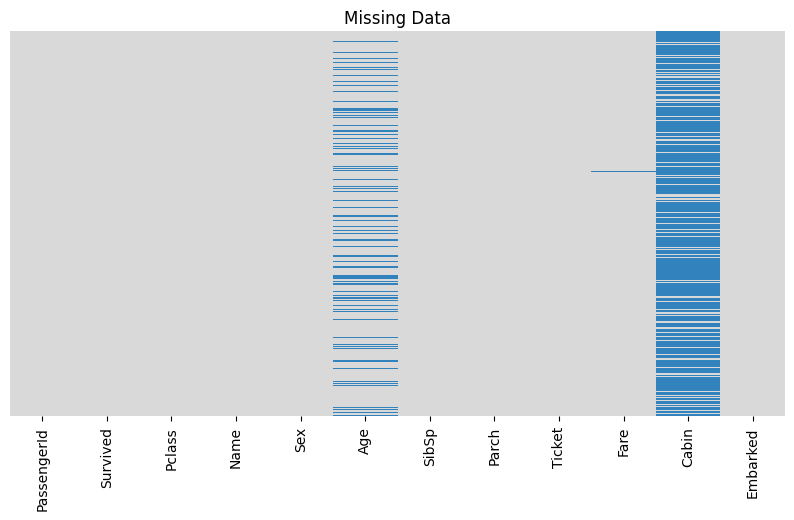

In [9]:
sns.heatmap(ds.isnull(),yticklabels = False, cbar= False, cmap= 'tab20c_r')
plt.title('Missing Data')
plt.show()

**Age representation of passengers according to passenger class:**

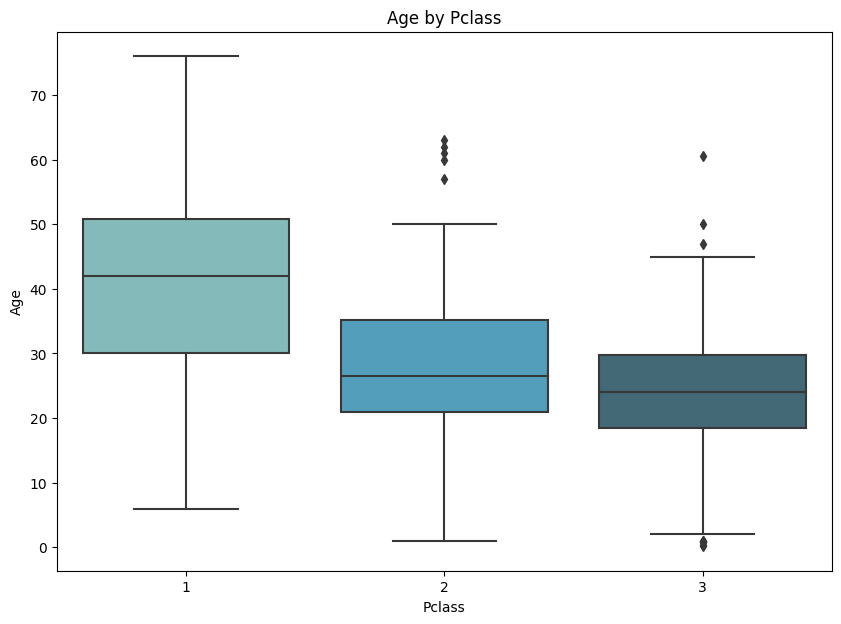

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=ds, palette='GnBu_d').set_title('Age by Pclass')
plt.show()

**Dealing with Missing Data:**

In [11]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):
    if Pclass==1:
      return 42
    elif Pclass==2:
      return 28
    else:
      return 25
  else:
    return Age
# Apply this function to the age column
ds['Age']=ds[['Age','Pclass']].apply(impute_age, axis=1)


**Remove Cabin columns because it contain to many missing values.**

In [12]:
ds.drop('Cabin', axis=1, inplace=True)

**Remove Remaining Missing Values:**

In [13]:
ds.dropna(inplace=True)

In [14]:
ds.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


**Removing Unnecessary Columns from data:**

In [15]:
ds.drop(['Name', 'Ticket'], axis=1, inplace=True)
#convert obects to category data type
obj=['Sex', 'Embarked']
for colname in obj:
  ds[colname]=ds[colname].astype('category')

**Numeric Summary of Dataset**

In [16]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.364508,2.263789,29.515588,0.448441,0.393285,35.627188
std,120.923774,0.481870,0.842077,12.848870,0.897568,0.982419,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,0.000000,3.000000,25.000000,0.000000,0.000000,14.454200
75%,1205.000000,1.000000,3.000000,36.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
ds.shape

(417, 9)

**Remove PassengerId column**

In [18]:
ds.drop(['PassengerId'], axis=1, inplace=True)

In [19]:
ds.shape

(417, 8)

**Identifying Categorical Columns**

In [20]:
ds.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

**Converting Categorical Variables into dummy or indicator variables is necessary otherwise ML algorithm will not be able to take these variables as input.**

In [21]:
sex=pd.get_dummies(ds['Sex'], drop_first=True)
embarked=pd.get_dummies(ds['Embarked'], drop_first=True)
# Adding new created columns in Dataset
ds=pd.concat([ds,sex,embarked], axis=1)

In [22]:
ds.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,34.5,0,0,7.8292,Q,1,1,0
1,1,3,female,47.0,1,0,7.0000,S,0,0,1
2,0,2,male,62.0,0,0,9.6875,Q,1,1,0
3,0,3,male,27.0,0,0,8.6625,S,1,0,1
4,1,3,female,22.0,1,1,12.2875,S,0,0,1


**Removing Sex and Embarked columns from Dataset because new dummy columns are created.**

In [23]:
ds.drop(['Sex', 'Embarked'], inplace=True, axis=1)
print("Train_Data shape", ds.shape)

Train_Data shape (417, 9)


In [24]:
ds.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1


***Now data is ready for ML algorithm***

**Split data to be used in models**

In [25]:
x=ds.drop('Survived', axis=1)
y=ds['Survived'] # This is the column that is intend to be predicted.
# Use x and y variables to split the Dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.20, random_state=101)


In [26]:
x_train.shape
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
13,2,63.0,1,0,26.0000,1,0,1
182,1,18.0,1,0,53.1000,0,0,1
156,1,29.0,0,0,221.7792,0,0,1
104,3,16.0,1,1,8.5167,0,0,0
32,3,33.0,1,2,20.5750,0,0,1
...,...,...,...,...,...,...,...,...
63,3,22.0,0,0,7.7250,0,1,0
327,1,46.0,0,0,79.2000,1,0,0
338,2,25.0,0,0,31.5000,1,0,1
11,1,46.0,0,0,26.0000,1,0,1


In [27]:
y_train

13     0
182    1
156    1
104    1
32     1
      ..
63     1
327    0
338    0
11     0
352    0
Name: Survived, Length: 333, dtype: int64

In [28]:
x_test.shape
x_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
358,3,25.0,0,0,7.7500,1,1,0
141,1,33.0,0,0,151.5500,0,0,1
385,2,24.0,1,2,65.0000,0,0,1
214,3,38.0,4,2,7.7750,0,0,1
139,3,40.0,1,6,46.9000,1,0,1
...,...,...,...,...,...,...,...,...
65,2,28.0,0,0,21.0000,0,0,1
48,1,60.0,0,0,76.2917,0,0,0
18,3,27.0,1,0,7.9250,0,0,1
15,2,24.0,1,0,27.7208,0,0,0


**Use ML Algorithm**

In [29]:
# Importing Model
from sklearn.linear_model import LogisticRegression
# Create model
lreg=LogisticRegression()
# Passing Training data to model
lreg.fit(x_train, y_train)


LogisticRegression()

**Prediction:**

In [30]:
y_pr_lreg = lreg.predict(x_test)
print(y_pr_lreg)
print(y_pr_lreg.shape)

[0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 1 0 0 1 1 1 1 1 1]
(84,)


**Finding the probabilities**

In [31]:
prob = lreg.predict_proba(x_test)[:, 1]
print(prob.shape)
print(prob)

(84,)
[0.03160614 0.95286259 0.95346769 0.94373463 0.05456122 0.95441426
 0.94108012 0.02198406 0.02243049 0.93268622 0.02676182 0.94520497
 0.04154591 0.02343419 0.92241554 0.92560458 0.04091148 0.0218679
 0.02378209 0.03165717 0.02166688 0.95951067 0.02271234 0.02186849
 0.94864829 0.92340976 0.9296682  0.92721787 0.94124249 0.02186045
 0.0236645  0.95013698 0.95525158 0.03272422 0.02242709 0.9240096
 0.02188011 0.02172678 0.0304344  0.93533698 0.0211816  0.02158244
 0.04199104 0.94061253 0.02910764 0.02242193 0.92562295 0.93844226
 0.02961745 0.0221492  0.94622099 0.03202458 0.95940666 0.92452128
 0.05260659 0.92386575 0.02257388 0.94279657 0.02116654 0.0221477
 0.94619404 0.02548136 0.9594675  0.92329153 0.97695389 0.02733646
 0.92490591 0.02686715 0.93569332 0.93774945 0.02343631 0.94463387
 0.02996751 0.03260391 0.95139079 0.9576212  0.02170702 0.02727117
 0.92431375 0.92789059 0.9440912  0.92453217 0.94133873 0.95761525]


In [32]:
for i in range(len(y_test)):
  print(round(prob[i],3), '-->', y_pr_lreg[i])

0.032 --> 0
0.953 --> 1
0.953 --> 1
0.944 --> 1
0.055 --> 0
0.954 --> 1
0.941 --> 1
0.022 --> 0
0.022 --> 0
0.933 --> 1
0.027 --> 0
0.945 --> 1
0.042 --> 0
0.023 --> 0
0.922 --> 1
0.926 --> 1
0.041 --> 0
0.022 --> 0
0.024 --> 0
0.032 --> 0
0.022 --> 0
0.96 --> 1
0.023 --> 0
0.022 --> 0
0.949 --> 1
0.923 --> 1
0.93 --> 1
0.927 --> 1
0.941 --> 1
0.022 --> 0
0.024 --> 0
0.95 --> 1
0.955 --> 1
0.033 --> 0
0.022 --> 0
0.924 --> 1
0.022 --> 0
0.022 --> 0
0.03 --> 0
0.935 --> 1
0.021 --> 0
0.022 --> 0
0.042 --> 0
0.941 --> 1
0.029 --> 0
0.022 --> 0
0.926 --> 1
0.938 --> 1
0.03 --> 0
0.022 --> 0
0.946 --> 1
0.032 --> 0
0.959 --> 1
0.925 --> 1
0.053 --> 0
0.924 --> 1
0.023 --> 0
0.943 --> 1
0.021 --> 0
0.022 --> 0
0.946 --> 1
0.025 --> 0
0.959 --> 1
0.923 --> 1
0.977 --> 1
0.027 --> 0
0.925 --> 1
0.027 --> 0
0.936 --> 1
0.938 --> 1
0.023 --> 0
0.945 --> 1
0.03 --> 0
0.033 --> 0
0.951 --> 1
0.958 --> 1
0.022 --> 0
0.027 --> 0
0.924 --> 1
0.928 --> 1
0.944 --> 1
0.925 --> 1
0.941 --> 1
0.958 --> 

**Performance of the Model:**

In [33]:
from sklearn.metrics import classification_report,  accuracy_score
print('Classification Model')
# Accuracy
print('--'*30)
logreg_accuracy = round(accuracy_score(y_test,y_pr_lreg) * 100,2)
print('Accuracy', logreg_accuracy, '%')

Classification Model
------------------------------------------------------------
Accuracy 100.0 %
